# Import modules

In [2]:
import pandas as pd
import numpy as np

# Create dataframe

In [3]:
df = pd.read_csv("C:/Users/vpala/Artificial Intelligence/BeCode/challenge-collecting-data/utils/properties.csv")
df.head(10)

,Locality,Price,Bedrooms,Living area,Kitchen type,Furnished,Terrace surface,Garden surface,Surface of the plot,Number of frontages,Swimming pool,Building condition,Type of property
0,bruxelles,"500,000",2,90,USA uninstalled,0,12,None,None,2,0,As new,apartment
1,oupeye,"84,000",1,89,Not installed,1,None,125,167,2,None,To renovate,house
2,laeken,"475,000",3,163,USA hyper equipped,0,8,None,None,3,None,As new,duplex
3,boutersem,"425,000",5,190,Semi equipped,0,None,None,1520,4,0,To renovate,house
4,ixelles,"2,700,000",5,557,Hyper equipped,None,50,60,None,2,None,As new,duplex
5,forest,"137,500",None,45,None,0,None,None,None,None,None,To renovate,flat-studio
6,bruxelles,"450,000",2,125,Hyper equipped,0,10,None,None,None,0,As new,apartment
7,koksijde,"349,000",2,87,Hyper equipped,1,2,None,None,None,0,Good,duplex
8,waterloo,"299,000",2,80,Installed,0,16,None,None,None,None,To renovate,apartment
9,tervuren,"4,950,000",6,750,Hyper equipped,None,150,None,20000,4,1,Good,villa


In [4]:
df[df["Bedrooms"] == "None"]["Type of property"].value_counts()

new-real-estate-project-apartments    552
flat-studio                           135
new-real-estate-project-houses        105
mixed-use-building                     18
apartment-block                        16
house                                   8
apartment                               8
kot                                     2
service-flat                            1
mansion                                 1
country-cottage                         1
penthouse                               1
villa                                   1
Name: Type of property, dtype: int64

# Remove new real estate projects

In [5]:
df.drop(df[df["Type of property"] == "new-real-estate-project-apartments"].index, inplace=True)

In [6]:
df.drop(df[df["Type of property"] == "new-real-estate-project-houses"].index, inplace=True)

# Clean column "Bedrooms"

### Subset dataframe for studios

In [7]:
df_studio = df[df["Type of property"] == "flat-studio"]

### Set number of rooms in studios to zero

In [8]:
df_studio["Bedrooms"].replace({"None":0, "1":0}, inplace=True)

C:\Users\vpala\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df_studio[["Bedrooms"]].value_counts()

Bedrooms
0           179
dtype: int64

### Merge dataframes

In [10]:
df.drop(df[df["Type of property"] == "flat-studio"].index, inplace=True)

In [11]:
df = pd.concat([df, df_studio])

In [12]:
df[df["Type of property"] == "flat-studio"][["Bedrooms"]].value_counts()

Bedrooms
0           179
dtype: int64

### Remove remaining properties with "Bedrooms" equal to "None"

In [13]:
df[df["Bedrooms"] == "None"].value_counts().sum()

57

In [14]:
df.drop(df[df["Bedrooms"] == "None"].index, inplace=True)

### Convert "Bedrooms" to integer

In [15]:
df.Bedrooms = df.Bedrooms.apply(lambda x : int(x))

In [16]:
df.Bedrooms.dtype

dtype('int64')

### Look for outliers

In [17]:
df.Bedrooms.sort_values(ascending=False).head()

1282    94
5248    27
6071    26
6565    23
1181    22
Name: Bedrooms, dtype: int64

In [18]:
df.loc[1282]

Locality                         dison
Price                        3,699,000
Bedrooms                            94
Living area                       3189
Kitchen type                 Installed
Furnished                            0
Terrace surface                    220
Garden surface                     778
Surface of the plot               3699
Number of frontages                  4
Swimming pool                        0
Building condition                Good
Type of property       apartment-block
Name: 1282, dtype: object

### Remove the one outlier

In [19]:
df.drop(1282, inplace=True)

# Clean column "Living area"

### Remove properties with "Living area" equal to "None"

In [20]:
df[df["Living area"] == "None"].value_counts().sum()

273

In [21]:
df.drop(df[df["Living area"] == "None"].index, inplace=True)

### Convert "Living area" to integer

In [22]:
df["Living area"] = df["Living area"].apply(lambda x: int(x))

In [23]:
df["Living area"]

0        90
1        89
2       163
3       190
4       557
       ... 
9862     24
9945     21
9969     24
9976     53
9990     30
Name: Living area, Length: 9015, dtype: int64

In [24]:
# Smallest living area
df["Living area"].min()

15

# Clean column "Price"

In [25]:
df[df["Price"] == "None"]

,Locality,Price,Bedrooms,Living area,Kitchen type,Furnished,Terrace surface,Garden surface,Surface of the plot,Number of frontages,Swimming pool,Building condition,Type of property
293,sint-eloois-vijve,None,4,184,Installed,None,None,None,358,2,None,Good,house
544,sint-niklaas,None,4,223,Installed,None,None,None,170,2,None,To renovate,house
565,seraing,None,1,70,Installed,None,None,None,None,None,None,Good,apartment
586,liezele,None,3,206,Installed,0,None,None,820,4,None,None,house
730,ombret,None,3,95,Installed,None,None,None,476,2,None,As new,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9625,heldergem,None,2,131,None,None,None,None,390,2,None,Good,house
9814,andenne,None,3,98,Installed,0,None,None,None,3,0,Good,apartment
9826,bornem,None,3,216,Installed,0,None,None,820,4,None,None,villa
9880,heusy,None,8,351,Installed,None,None,None,965,4,None,To be done up,villa


### Remove properties with "Price" equal to "None"

In [26]:
df.drop(df[df["Price"] == "None"].index, inplace=True)

### Convert "Price" to integer

In [27]:
df.Price = df.Price.apply(lambda x: int(x.replace(",", "")))

In [28]:
df.Price.dtype

dtype('int64')

# Remove useless columns

In [29]:
df.columns

Index(['Locality', 'Price', 'Bedrooms', 'Living area', 'Kitchen type',
       'Furnished', 'Terrace surface', 'Garden surface', 'Surface of the plot',
       'Number of frontages', 'Swimming pool', 'Building condition',
       'Type of property'],
      dtype='object')

In [30]:
df.drop(["Surface of the plot", "Number of frontages", "Building condition"], axis=1, inplace=True)

In [31]:
df.head()

,Locality,Price,Bedrooms,Living area,Kitchen type,Furnished,Terrace surface,Garden surface,Swimming pool,Type of property
0,bruxelles,500000,2,90,USA uninstalled,0,12,None,0,apartment
1,oupeye,84000,1,89,Not installed,1,None,125,None,house
2,laeken,475000,3,163,USA hyper equipped,0,8,None,None,duplex
3,boutersem,425000,5,190,Semi equipped,0,None,None,0,house
4,ixelles,2700000,5,557,Hyper equipped,None,50,60,None,duplex


# Clean "Kitchen type"

In [32]:
# not equipped, semi-equipped, equipped or super-equipped
df["Kitchen type"].replace({
    "Installed":"equipped",
    "Hyper equipped":"super-equipped",
    "None":"not equipped",
    "Semi equipped":"semi-equipped",
    "USA hyper equipped":"super-equipped",
    "Not installed":"not equipped",
    "USA installed":"equipped",
    "USA semi equipped":"semi-equipped",
    "USA uninstalled":"not equipped",
    }, inplace=True)

In [33]:
df["Kitchen type"].value_counts()

equipped          3569
super-equipped    2571
not equipped      1659
semi-equipped     1132
Name: Kitchen type, dtype: int64

# Convert remaining "None" to zeros

In [34]:
df.replace("None", 0, inplace=True)

In [35]:
df.head()

,Locality,Price,Bedrooms,Living area,Kitchen type,Furnished,Terrace surface,Garden surface,Swimming pool,Type of property
0,bruxelles,500000,2,90,not equipped,0,12,0,0,apartment
1,oupeye,84000,1,89,not equipped,1,0,125,0,house
2,laeken,475000,3,163,super-equipped,0,8,0,0,duplex
3,boutersem,425000,5,190,semi-equipped,0,0,0,0,house
4,ixelles,2700000,5,557,super-equipped,0,50,60,0,duplex


# Simple linear regression

In [36]:
df.corr()

,Price,Bedrooms,Living area
Price,1.000000,0.416134,0.593956
Bedrooms,0.416134,1.000000,0.690171
Living area,0.593956,0.690171,1.000000


### Define target variable

In [37]:
y = df["Price"]
y = np.array(y)
print(type(y))

<class 'numpy.ndarray'>


### Define feature

In [38]:
x = np.array(df["Living area"])
type(x)

numpy.ndarray

### Visualize data

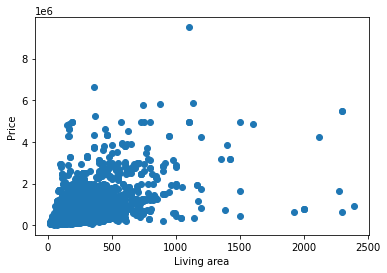

In [39]:
import matplotlib.pyplot as plt

plt.scatter(x=x, y=y)
plt.xlabel("Living area")
plt.ylabel("Price")
plt.show()

### Train model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
regressor = LinearRegression().fit(X_train, y_train)
regressor.score(X_train, y_train)

0.37090850946704346

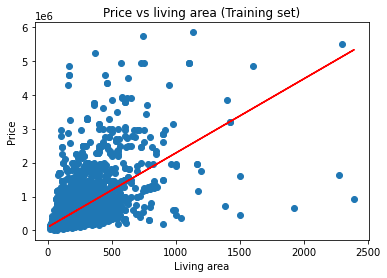

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color="r")
plt.title("Price vs living area (Training set)")
plt.xlabel("Living area")
plt.ylabel("Price")
plt.show()

### Test model

In [42]:
X_test = X_test.reshape(-1, 1)
regressor.predict(X_test)
regressor.score(X_test, y_test)

0.31223999924897383

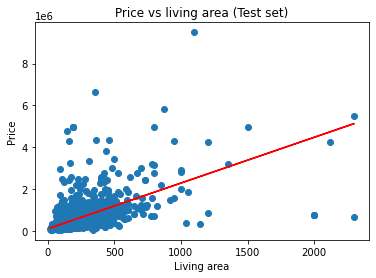

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color="r")
plt.title("Price vs living area (Test set)")
plt.xlabel("Living area")
plt.ylabel("Price")
plt.show()

# Multiple linear regression

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
df

,Locality,Price,Bedrooms,Living area,Kitchen type,Furnished,Terrace surface,Garden surface,Swimming pool,Type of property
0,bruxelles,500000,2,90,not equipped,0,12,0,0,apartment
1,oupeye,84000,1,89,not equipped,1,0,125,0,house
2,laeken,475000,3,163,super-equipped,0,8,0,0,duplex
3,boutersem,425000,5,190,semi-equipped,0,0,0,0,house
4,ixelles,2700000,5,557,super-equipped,0,50,60,0,duplex
...,...,...,...,...,...,...,...,...,...,...
9862,westende,77500,0,24,not equipped,0,0,0,0,flat-studio
9945,leuven,147000,0,21,semi-equipped,0,0,0,0,flat-studio
9969,nivelles,90000,0,24,semi-equipped,0,0,0,0,flat-studio
9976,schaerbeek,185000,0,53,super-equipped,0,4,0,0,flat-studio


### Define target and features

In [78]:
y = np.array(df["Price"]).reshape(-1, 1)
X = np.array(df[["Bedrooms", "Living area"]])

In [79]:
y.shape

(8931, 1)

In [81]:
X.shape

(8931, 2)

### Visualize data

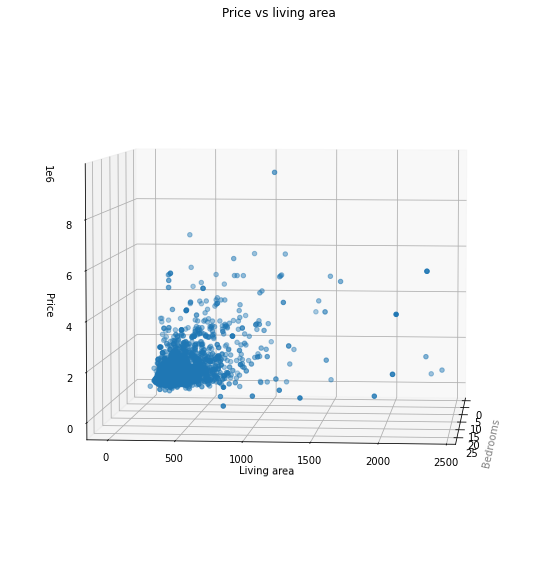

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(10, 10)
ax.view_init(5, 5)

ax.scatter(df["Bedrooms"], df["Living area"], df["Price"])
# ax.ticklabel_format(style='plain')
ax.set_title("Price vs living area")
ax.set_xlabel("Bedrooms", c='gray')
ax.set_ylabel("Living area")
ax.set_zlabel("Price");

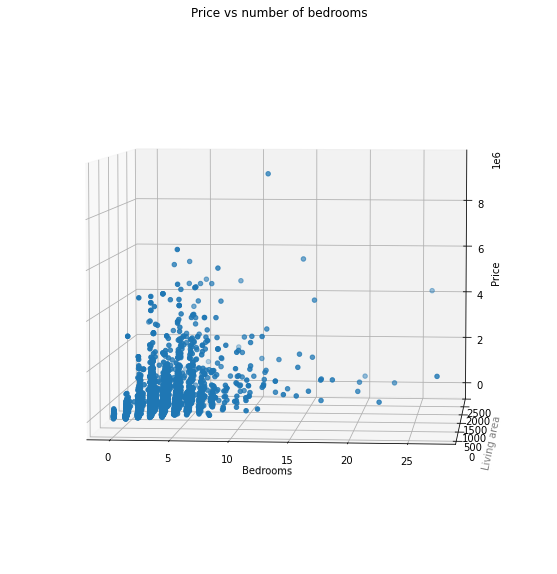

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(10, 10)
ax.view_init(5, 275)

ax.scatter(df["Bedrooms"], df["Living area"], df["Price"])
# ax.ticklabel_format(style='plain')
ax.set_title("Price vs number of bedrooms")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Living area", color='gray')
ax.set_zlabel("Price");

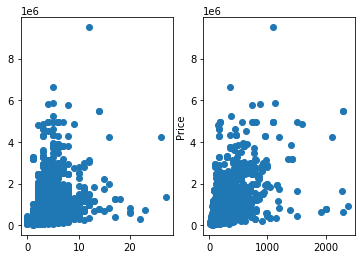

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# plt.tight_layout()
axes[0].scatter(df["Bedrooms"],df["Price"])
axes[1].scatter(df["Living area"],df["Price"])
plt.ylabel("Price")
plt.show()

### Train model

In [75]:
df.corr()

,Price,Bedrooms,Living area
Price,1.000000,0.416134,0.593956
Bedrooms,0.416134,1.000000,0.690171
Living area,0.593956,0.690171,1.000000


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [87]:
print("Shape of X_train     ", X_train.shape)
print("Shape of X_test      ", X_test.shape)
print("Shape of y_train     ", y_train.shape)
print("Shape of y_test      ", y_test.shape)

Shape of X_train      (7144, 2)
Shape of X_test       (1787, 2)
Shape of y_train      (7144, 1)
Shape of y_test       (1787, 1)


In [84]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.36573196295749544

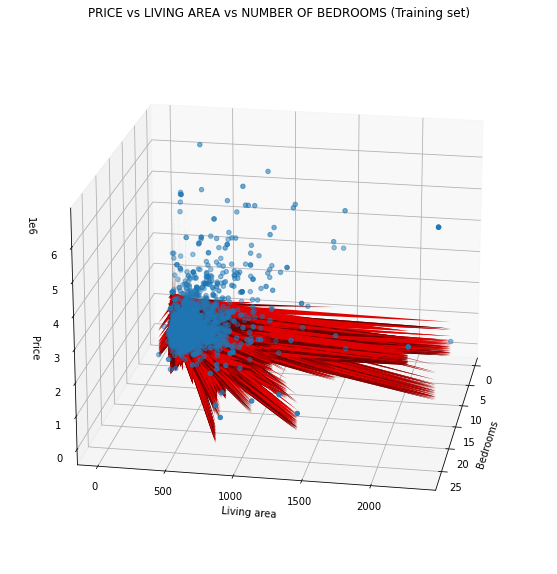

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(10, 10)
ax.view_init(20, 10)

ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_title("PRICE vs LIVING AREA vs NUMBER OF BEDROOMS (Training set)")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Living area")
ax.set_zlabel("Price")

ax.plot_surface(X_train[:,0], X_train[:,1], regressor.predict(X_train), color='r')

### Test model

In [162]:
regressor.predict(X_test)
regressor.score(X_test, y_test)

0.30894428408220476

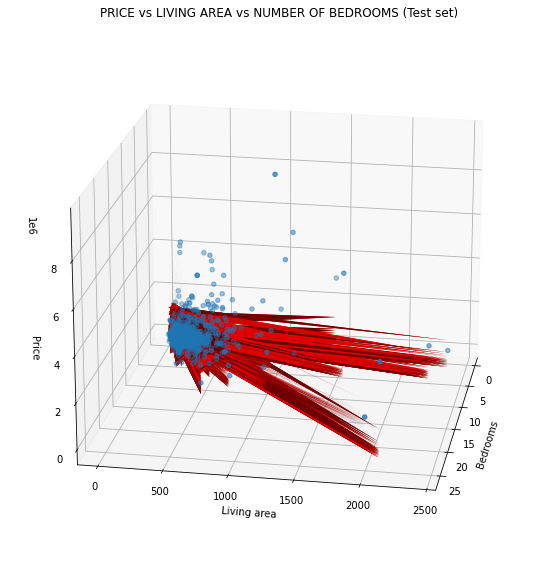

In [191]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(10, 10)
ax.view_init(20, 10)

ax.scatter(X_test[:,0], X_test[:,1], y_test)
ax.set_title("PRICE vs LIVING AREA vs NUMBER OF BEDROOMS (Test set)")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Living area")
ax.set_zlabel("Price")

ax.plot_surface(X_test[:,0], X_test[:,1], regressor.predict(X_test), color='r')